In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# reading csv file
first_df = pd.read_csv('raw_data/shown_tract_allCharacteristics.csv')

# dropping unnessary columns
first_df = first_df.drop(['Job_Growth_Rate_from_2004_to_2013', 'Median_Hhold._Income_of_Residents_in_1990', 'Fraction_Non-White_in_2010','Foreign-Born_Share_in_2012-16','Fraction_Single_Parents_in_2012-16','Population_Density_in_2010','Density_of_Jobs_in_2013','Census_Response_Rate_Social_Capital_Proxy'], axis=1)

In [2]:
# empty list to store the list from the data
IL_state_city = []
# copy of the dataframe
copy_df = first_df
# loop to extract the state from the dataframe we created before
for index, row in first_df.iterrows():
    state = row["Name"].split(", ")
    if "IL" in state:
        IL_state_city.append(state[0])
    else:
        copy_df.drop(index,inplace=True)
# creating new column city 
copy_df["city"] = IL_state_city
# renaming the column names
copy_df.rename(columns={'Median_Rent_2012-16': 'Median_Rent', 
                        'Median_Hhold._Income_of_Residents_in_2012-16': 'Median_Hhold_Income',
                        'Poverty_Rate_in_2012-16':'Poverty_Rate',
                        'Fraction_College_Graduates_in_2012-16':'College_Graduates',
                        'Fraction_with_Short_Work_Commutes_in_2012-16':'Short_Work_Commutes',
                        }, inplace=True)
        

In [3]:
filtered_df = copy_df[copy_df['Name'].str.contains('Chicago, IL', case=False, na=False)].dropna()

In [4]:
chi_suburbs_df = copy_df[~copy_df['Name'].str.contains('Chicago', case= False, na=False)]
chi_suburbs_df['area'] = 'Chicago Suburbs'

In [5]:
west = filtered_df.loc[filtered_df['city'].isin([
'Humboldt Park', 'East Garfield Park', 'West Garfield Park', 'West Town', 'Noble Square', 
'Ukrainian Village', 'Austin', 'South Austin', 'Near West Side', 'Garfield Park', 
'East Garfield Park', 'West Garfield Park', 'Lawndale', 'North Lawndale', 'Little Village', 'South Lawndale', 
'Douglas Park', 'Marshall Square','West Humboldt Park', 'Cragin', 'Fulton River District', 'University Village / Little Italy', 
'Illinois Medical District', 'Clearing', 'Garfield Ridge', 'Archer Heights', 'Brighton Park', 'McKinley Park'
])]
west['area'] = 'Chicago West Side'

In [6]:
south = filtered_df.loc[filtered_df['city']== 'South Side']

In [7]:
north = filtered_df.loc[filtered_df['city'].isin(['Rogers Park', 'West Ridge', 'West Rogers Park', 'Peterson Park', 'Edgewater', 'Magnolia Glen', 'Edgewater Beach', 'Uptown',
'Lincoln Square', 'Budlong Woods', 'North Center', 'Roscoe Village', 'West Lakeview', 'Lake View', 'Wrigleyville', 'Lake View East',
'Boystown', 'Lincoln Park', 'Edison Park', 'Norwood Park', 'Jefferson Park', 'Gladstone Park', 'Edgebrook', 'Forest Glen', 
'Pulaski Park', 'North Park', 'Hollywood Park', 'Albany Park', 'Irving Park', 'Old Irving Park', 'Irving Park East', 'Kilbourn Park',
'Dunning', 'Belmont Heights', 'Montclare', 'Belmont Cragin', 'Belmont Central', 'Belmont Gardens', 'Hermosa', 'Avondale', 'Logan Square', 'Bucktown', "O'Hare", 'Portage Park'])]
north['area'] = 'Chicago North Side'

In [8]:
East = filtered_df.loc[filtered_df['city'].isin(['Streeterville', 'River North', 'Cabrini-Green', 'Near North Side',
'Old Town', 'Near North', 'Chicago Loop', 'South Loop',
'Near South Side', 'East Pilsen', 'Lower West Side',
'Heart of Chicago', 'Oakland', 'South Shore', 'East Side', 'Goose Island', 'Gold Coast'])]
East['area'] = 'Chicago East Side'

In [9]:
South = filtered_df.loc[filtered_df['city'].isin(['Douglas', 'Kenwood', 'Hyde Park', 'East Hyde Park', 'Park Manor', 'South Shore', 'Grand Crossing',
'East Chatham', 'South Chicago', 'Calumet Heights', 'Roseland', 'Longwood Manor', 'Fernwood', 'Cottage Grove Heights',
'South Deering', 'Jeffrey Manor', 'Golden Gate', 'West Englewood', 'Englewood', 'Greater Grand Crossing', 'Ashburn',
'Auburn Gresham', 'Beverly', 'Brainerd', 'Mount Greenwood', 'Morgan Park', 'Kennedy Park', 'Avalon Park', 'Princeton Park', 'Fuller Park', 'Armour Square',
'Bridgeport','Back of the Yards', 'Canaryville', 'Gage Park', 'Chicago Lawn', 'South Side', 'Bronzeville' ])]
South['area'] = 'Chicago South Side'

In [10]:
combined_df = pd.concat([north, East, west, South, chi_suburbs_df], ignore_index=True)

In [11]:
# importing json file
copy_df.to_json('cleaned_data/cleaned_data.json')
# importing csv file
copy_df.to_csv('cleaned_data/cleaned_data.csv')
        

In [12]:
grouped_combined_df= combined_df.groupby('area').mean(numeric_only=True).drop(columns = ['tract']). round(2).sort_values('Median_Rent', ascending=True).reset_index()
grouped_combined_df


,area,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes
0,Chicago South Side,894.44,37768.83,0.29,0.22,0.12
1,Chicago West Side,986.45,43953.34,0.30,0.26,0.13
2,Chicago North Side,1128.69,65635.90,0.15,0.49,0.10
3,Chicago Suburbs,1220.39,75989.82,0.10,0.40,0.20
4,Chicago East Side,1238.34,63088.34,0.20,0.51,0.17


In [13]:
grouped_combined_df['area'].unique()

array(['Chicago South Side', 'Chicago West Side', 'Chicago North Side',
       'Chicago Suburbs', 'Chicago East Side'], dtype=object)

In [14]:
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(grouped_combined_df, x = 'College_Graduates', y= 'Median_Hhold_Income', size = 'Median_Rent', text = "area") 

fig.show()

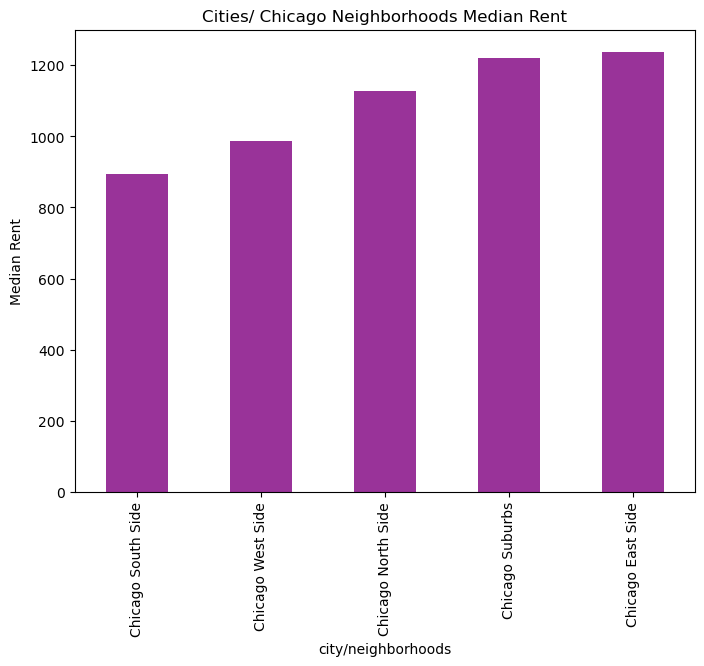

In [15]:
plot = grouped_combined_df.plot(kind= "bar",
            x= 'area',
            y= 'Median_Rent',
            color= 'purple',
            figsize= (8, 6),
            alpha = 0.8,
            legend = False,
            title= 'Cities/ Chicago Neighborhoods Median Rent', 
            xlabel = 'city/neighborhoods',
            ylabel = 'Median Rent')


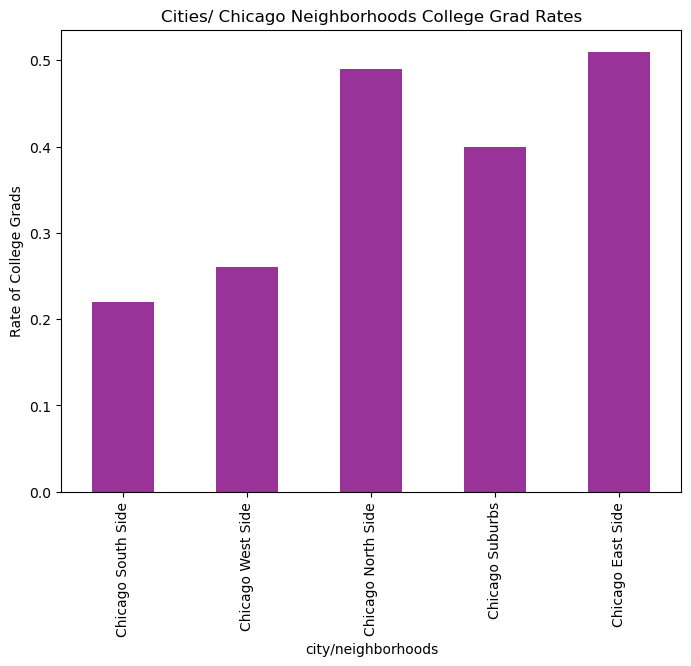

In [16]:
plot = grouped_combined_df.plot(kind= "bar",
            x= 'area',
            y= 'College_Graduates',
            color= 'purple',
            figsize= (8, 6),
            alpha = 0.8,
            legend = False,
            title= 'Cities/ Chicago Neighborhoods College Grad Rates', 
            xlabel = 'city/neighborhoods',
            ylabel = 'Rate of College Grads')

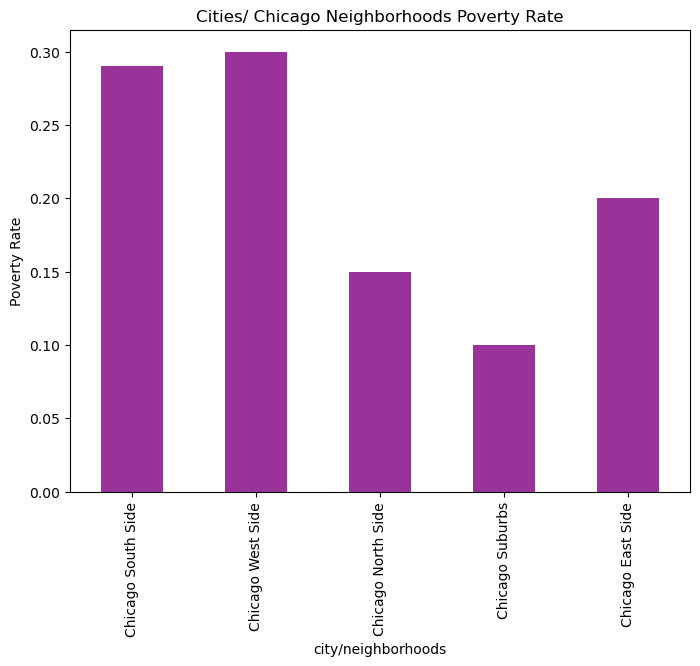

In [17]:
plot = grouped_combined_df.plot(kind= "bar",
            x= 'area',
            y= 'Poverty_Rate',
            color= 'purple',
            figsize= (8, 6),
            alpha = 0.8,
            legend = False,
            title= 'Cities/ Chicago Neighborhoods Poverty Rate', 
            xlabel = 'city/neighborhoods',
            ylabel = 'Poverty Rate')

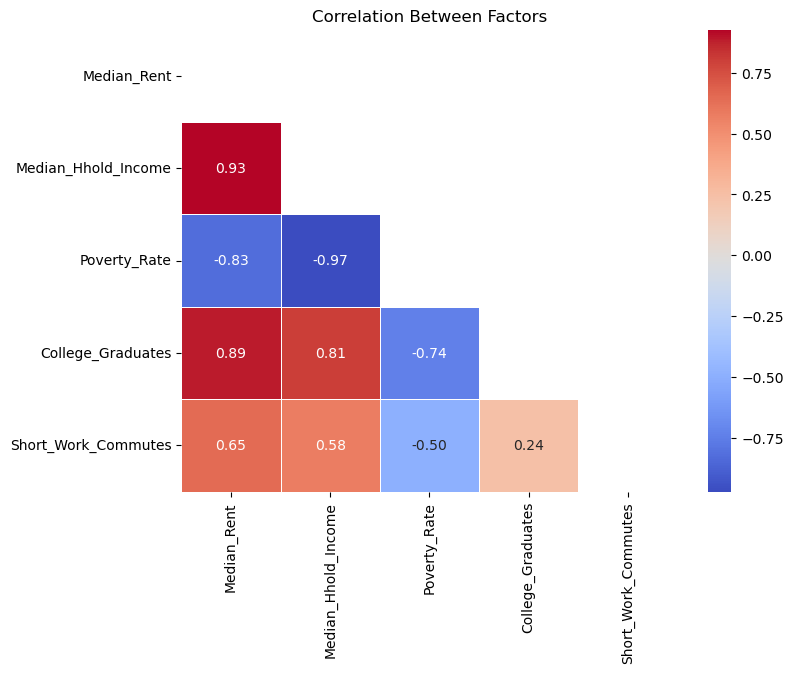

In [18]:
# Calculate correlation matrix
corr = grouped_combined_df[['Median_Rent', 'Median_Hhold_Income', 'Poverty_Rate', 'College_Graduates', 'Short_Work_Commutes']].corr()

# Create a mask to cover the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title('Correlation Between Factors')
plt.show()
